In [1]:

# imports
import os
import sys
import types
import json
import base64

# figure size/format
fig_width = 7
fig_height = 5
fig_format = 'retina'
fig_dpi = 96
interactivity = ''
is_shiny = False
is_dashboard = False
plotly_connected = True

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = "figure"

  # IPython 7.14 deprecated set_matplotlib_formats from IPython
  try:
    from matplotlib_inline.backend_inline import set_matplotlib_formats
  except ImportError:
    # Fall back to deprecated location for older IPython versions
    from IPython.display import set_matplotlib_formats
    
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  if plotly_connected:
    pio.renderers.default = "notebook_connected"
  else:
    pio.renderers.default = "notebook"
  for template in pio.templates.keys():
    pio.templates[template].layout.margin = dict(t=30,r=0,b=0,l=0)
except Exception:
  pass

# disable itables paging for dashboards
if is_dashboard:
  try:
    from itables import options
    options.dom = 'fiBrtlp'
    options.maxBytes = 1024 * 1024
    options.language = dict(info = "Showing _TOTAL_ entries")
    options.classes = "display nowrap compact"
    options.paging = False
    options.searching = True
    options.ordering = True
    options.info = True
    options.lengthChange = False
    options.autoWidth = False
    options.responsive = True
    options.keys = True
    options.buttons = []
  except Exception:
    pass
  
  try:
    import altair as alt
    # By default, dashboards will have container sized
    # vega visualizations which allows them to flow reasonably
    theme_sentinel = '_quarto-dashboard-internal'
    def make_theme(name):
        nonTheme = alt.themes._plugins[name]    
        def patch_theme(*args, **kwargs):
            existingTheme = nonTheme()
            if 'height' not in existingTheme:
              existingTheme['height'] = 'container'
            if 'width' not in existingTheme:
              existingTheme['width'] = 'container'

            if 'config' not in existingTheme:
              existingTheme['config'] = dict()
            
            # Configure the default font sizes
            title_font_size = 15
            header_font_size = 13
            axis_font_size = 12
            legend_font_size = 12
            mark_font_size = 12
            tooltip = False

            config = existingTheme['config']

            # The Axis
            if 'axis' not in config:
              config['axis'] = dict()
            axis = config['axis']
            if 'labelFontSize' not in axis:
              axis['labelFontSize'] = axis_font_size
            if 'titleFontSize' not in axis:
              axis['titleFontSize'] = axis_font_size  

            # The legend
            if 'legend' not in config:
              config['legend'] = dict()
            legend = config['legend']
            if 'labelFontSize' not in legend:
              legend['labelFontSize'] = legend_font_size
            if 'titleFontSize' not in legend:
              legend['titleFontSize'] = legend_font_size  

            # The header
            if 'header' not in config:
              config['header'] = dict()
            header = config['header']
            if 'labelFontSize' not in header:
              header['labelFontSize'] = header_font_size
            if 'titleFontSize' not in header:
              header['titleFontSize'] = header_font_size    

            # Title
            if 'title' not in config:
              config['title'] = dict()
            title = config['title']
            if 'fontSize' not in title:
              title['fontSize'] = title_font_size

            # Marks
            if 'mark' not in config:
              config['mark'] = dict()
            mark = config['mark']
            if 'fontSize' not in mark:
              mark['fontSize'] = mark_font_size

            # Mark tooltips
            if tooltip and 'tooltip' not in mark:
              mark['tooltip'] = dict(content="encoding")

            return existingTheme
            
        return patch_theme

    # We can only do this once per session
    if theme_sentinel not in alt.themes.names():
      for name in alt.themes.names():
        alt.themes.register(name, make_theme(name))
      
      # register a sentinel theme so we only do this once
      alt.themes.register(theme_sentinel, make_theme('default'))
      alt.themes.enable('default')

  except Exception:
    pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass

# interactivity
if interactivity:
  from IPython.core.interactiveshell import InteractiveShell
  InteractiveShell.ast_node_interactivity = interactivity

# NOTE: the kernel_deps code is repeated in the cleanup.py file
# (we can't easily share this code b/c of the way it is run).
# If you edit this code also edit the same code in cleanup.py!

# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
run_path = 'L1VzZXJzL3NhaGkvcHJvamV0cy9zYWhpLW1mZy5naXRodWIuaW8vcG9zdHM='
if run_path:
  # hex-decode the path
  run_path = base64.b64decode(run_path.encode("utf-8")).decode("utf-8")
  os.chdir(run_path)

# reset state
%reset

# shiny
# Checking for shiny by using False directly because we're after the %reset. We don't want
# to set a variable that stays in global scope.
if False:
  try:
    import htmltools as _htmltools
    import ast as _ast

    _htmltools.html_dependency_render_mode = "json"

    # This decorator will be added to all function definitions
    def _display_if_has_repr_html(x):
      try:
        # IPython 7.14 preferred import
        from IPython.display import display, HTML
      except:
        from IPython.core.display import display, HTML

      if hasattr(x, '_repr_html_'):
        display(HTML(x._repr_html_()))
      return x

    # ideally we would undo the call to ast_transformers.append
    # at the end of this block whenver an error occurs, we do 
    # this for now as it will only be a problem if the user 
    # switches from shiny to not-shiny mode (and even then likely
    # won't matter)
    import builtins
    builtins._display_if_has_repr_html = _display_if_has_repr_html

    class _FunctionDefReprHtml(_ast.NodeTransformer):
      def visit_FunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

      def visit_AsyncFunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

    ip = get_ipython()
    ip.ast_transformers.append(_FunctionDefReprHtml())

  except:
    pass

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v

  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define
globals()["__spec__"] = None

{"/Users/sahi/.local/share/uv/python/cpython-3.12.5-macos-aarch64-none/lib/python3.12/importlib/_bootstrap.py": 1755105726.7658, "/Users/sahi/.local/share/uv/python/cpython-3.12.5-macos-aarch64-none/lib/python3.12/importlib/_bootstrap_external.py": 1755105726.7661884, "/Users/sahi/.local/share/uv/python/cpython-3.12.5-macos-aarch64-none/lib/python3.12/zipimport.py": 1755105726.9249468, "/Users/sahi/.local/share/uv/python/cpython-3.12.5-macos-aarch64-none/lib/python3.12/codecs.py": 1755105726.550626, "/Users/sahi/.local/share/uv/python/cpython-3.12.5-macos-aarch64-none/lib/python3.12/encodings/aliases.py": 1755105726.572362, "/Users/sahi/.local/share/uv/python/cpython-3.12.5-macos-aarch64-none/lib/python3.12/encodings/__init__.py": 1755105726.571646, "/Users/sahi/.local/share/uv/python/cpython-3.12.5-macos-aarch64-none/lib/python3.12/encodings/utf_8.py": 1755105726.5857062, "/Users/sahi/.local/share/uv/python/cpython-3.12.5-macos-aarch64-none/lib/python3.12/abc.py": 1755105726.534, "/Us

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# Configuration pour des graphiques plus esthétiques
plt.style.use('default')
sns.set_palette("husl")

In [3]:
# Génération de données temporelles
np.random.seed(42)
dates = pd.date_range('2024-01-01', '2024-12-31', freq='D')
n_days = len(dates)

# Simulation de données de ventes
base_sales = 1000
seasonal_factor = 200 * np.sin(2 * np.pi * np.arange(n_days) / 365.25)
trend = 0.5 * np.arange(n_days)
noise = np.random.normal(0, 50, n_days)
sales = base_sales + seasonal_factor + trend + noise

# Création du DataFrame
df = pd.DataFrame({
    'date': dates,
    'sales': sales,
    'month': dates.month,
    'day_of_week': dates.day_name()
})

# Ajout de catégories
df['category'] = np.random.choice(['Électronique', 'Vêtements', 'Livres', 'Maison'], n_days)
df['region'] = np.random.choice(['Nord', 'Sud', 'Est', 'Ouest'], n_days)

print(f"Dataset créé avec {len(df)} entrées")
df.head()

Dataset créé avec 366 entrées


,date,sales,month,day_of_week,category,region
0,2024-01-01,1024.835708,1,Monday,Vêtements,Est
1,2024-01-02,997.027100,1,Tuesday,Électronique,Sud
2,2024-01-03,1040.264039,1,Wednesday,Vêtements,Sud
3,2024-01-04,1087.968366,1,Thursday,Vêtements,Est
4,2024-01-05,1004.043413,1,Friday,Maison,Ouest


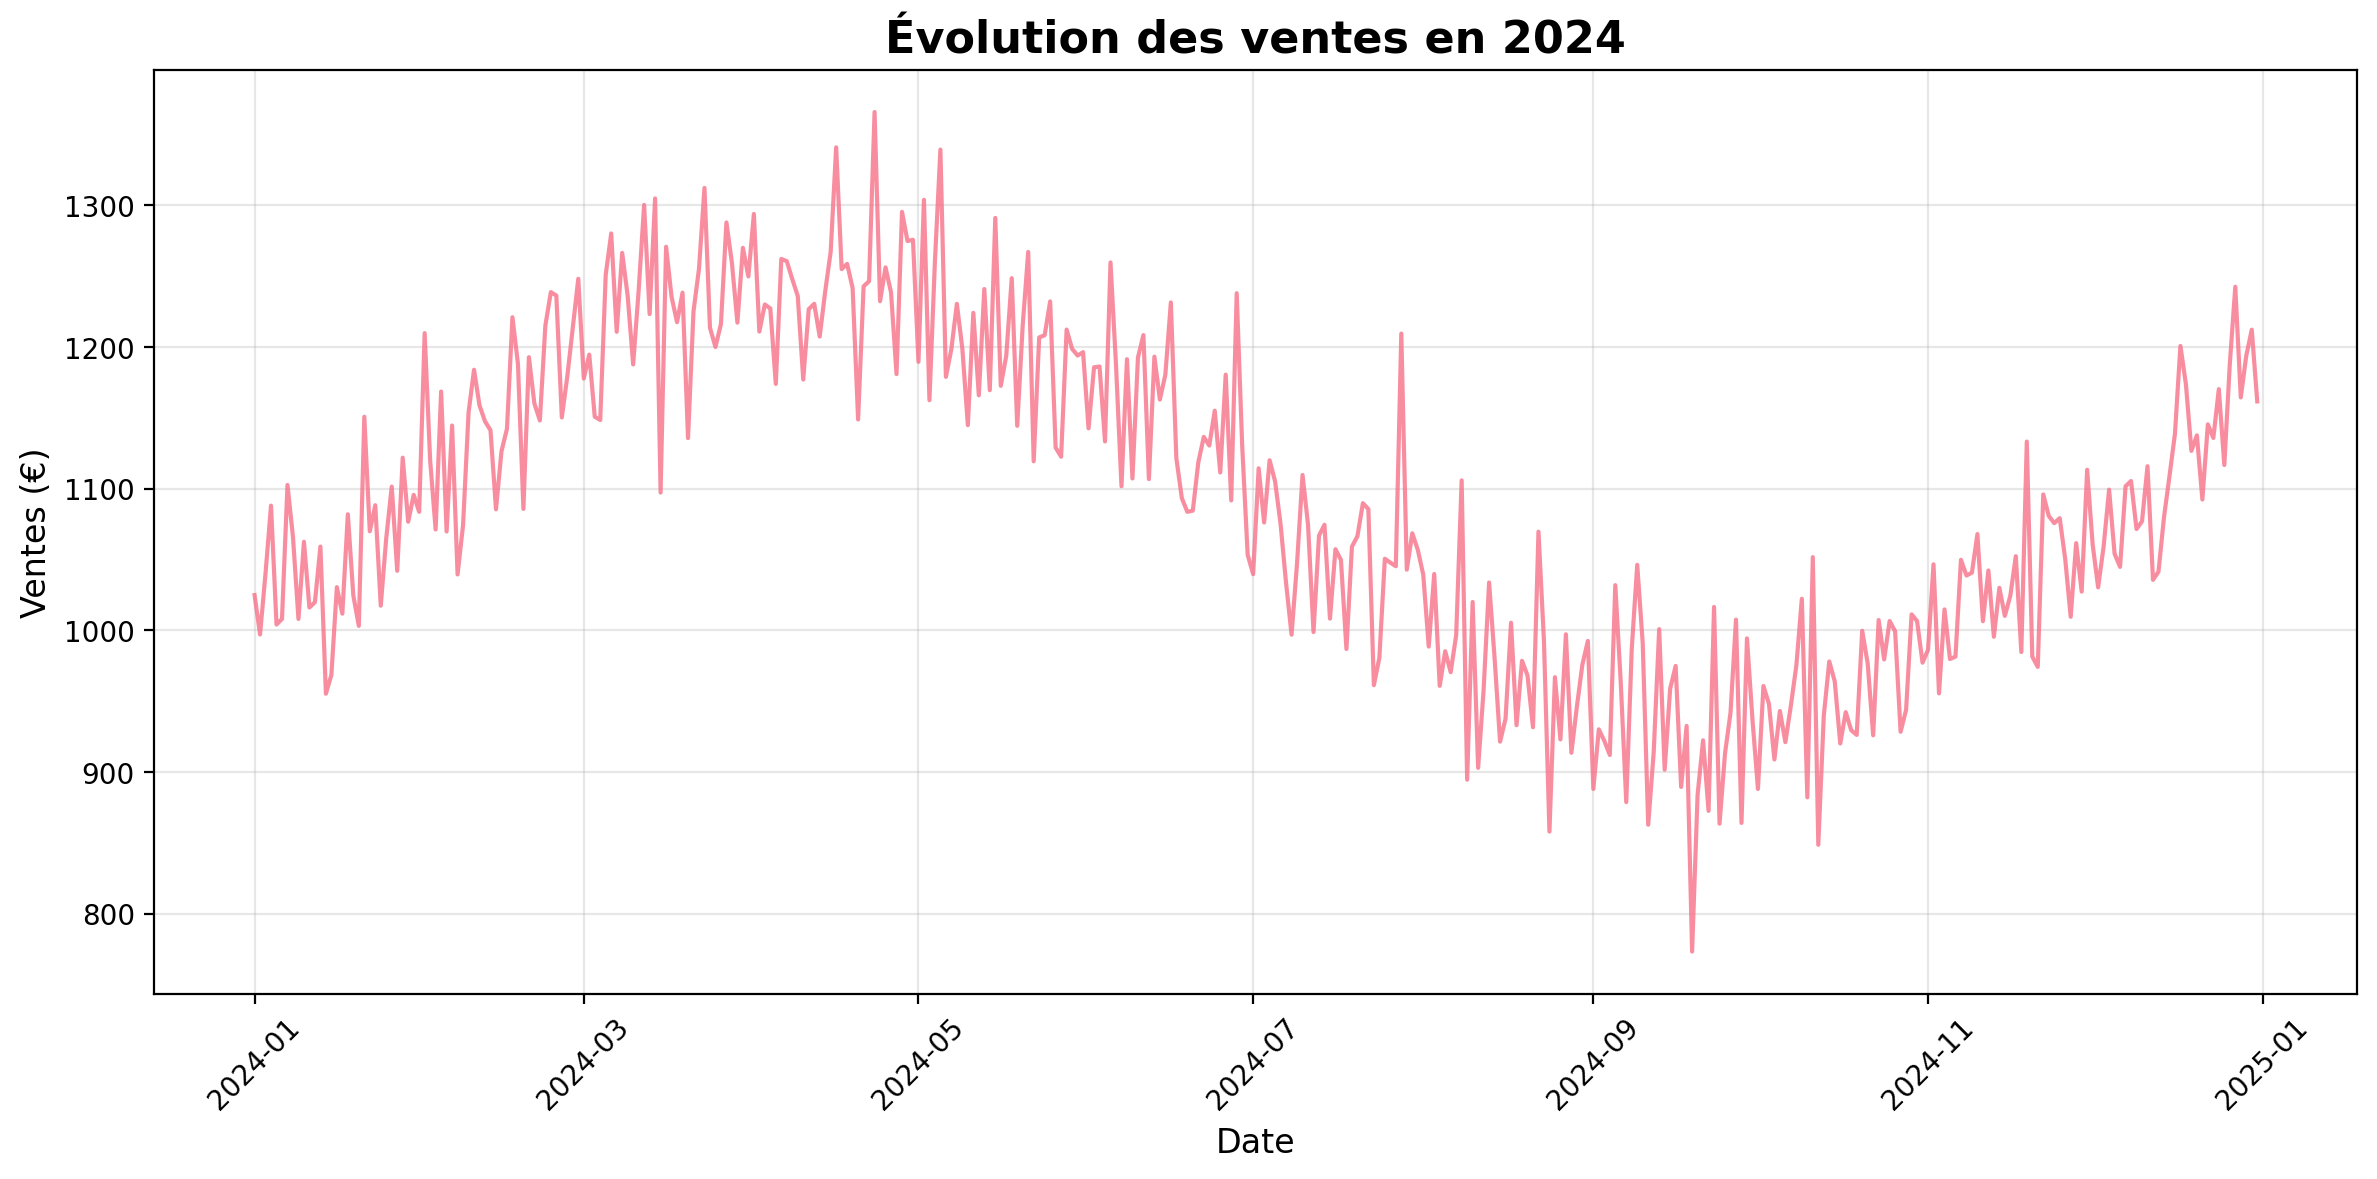

In [4]:
#| fig-cap: "Évolution des ventes au cours de l'année 2024"

plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['sales'], linewidth=1.5, alpha=0.8)
plt.title('Évolution des ventes en 2024', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Ventes (€)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

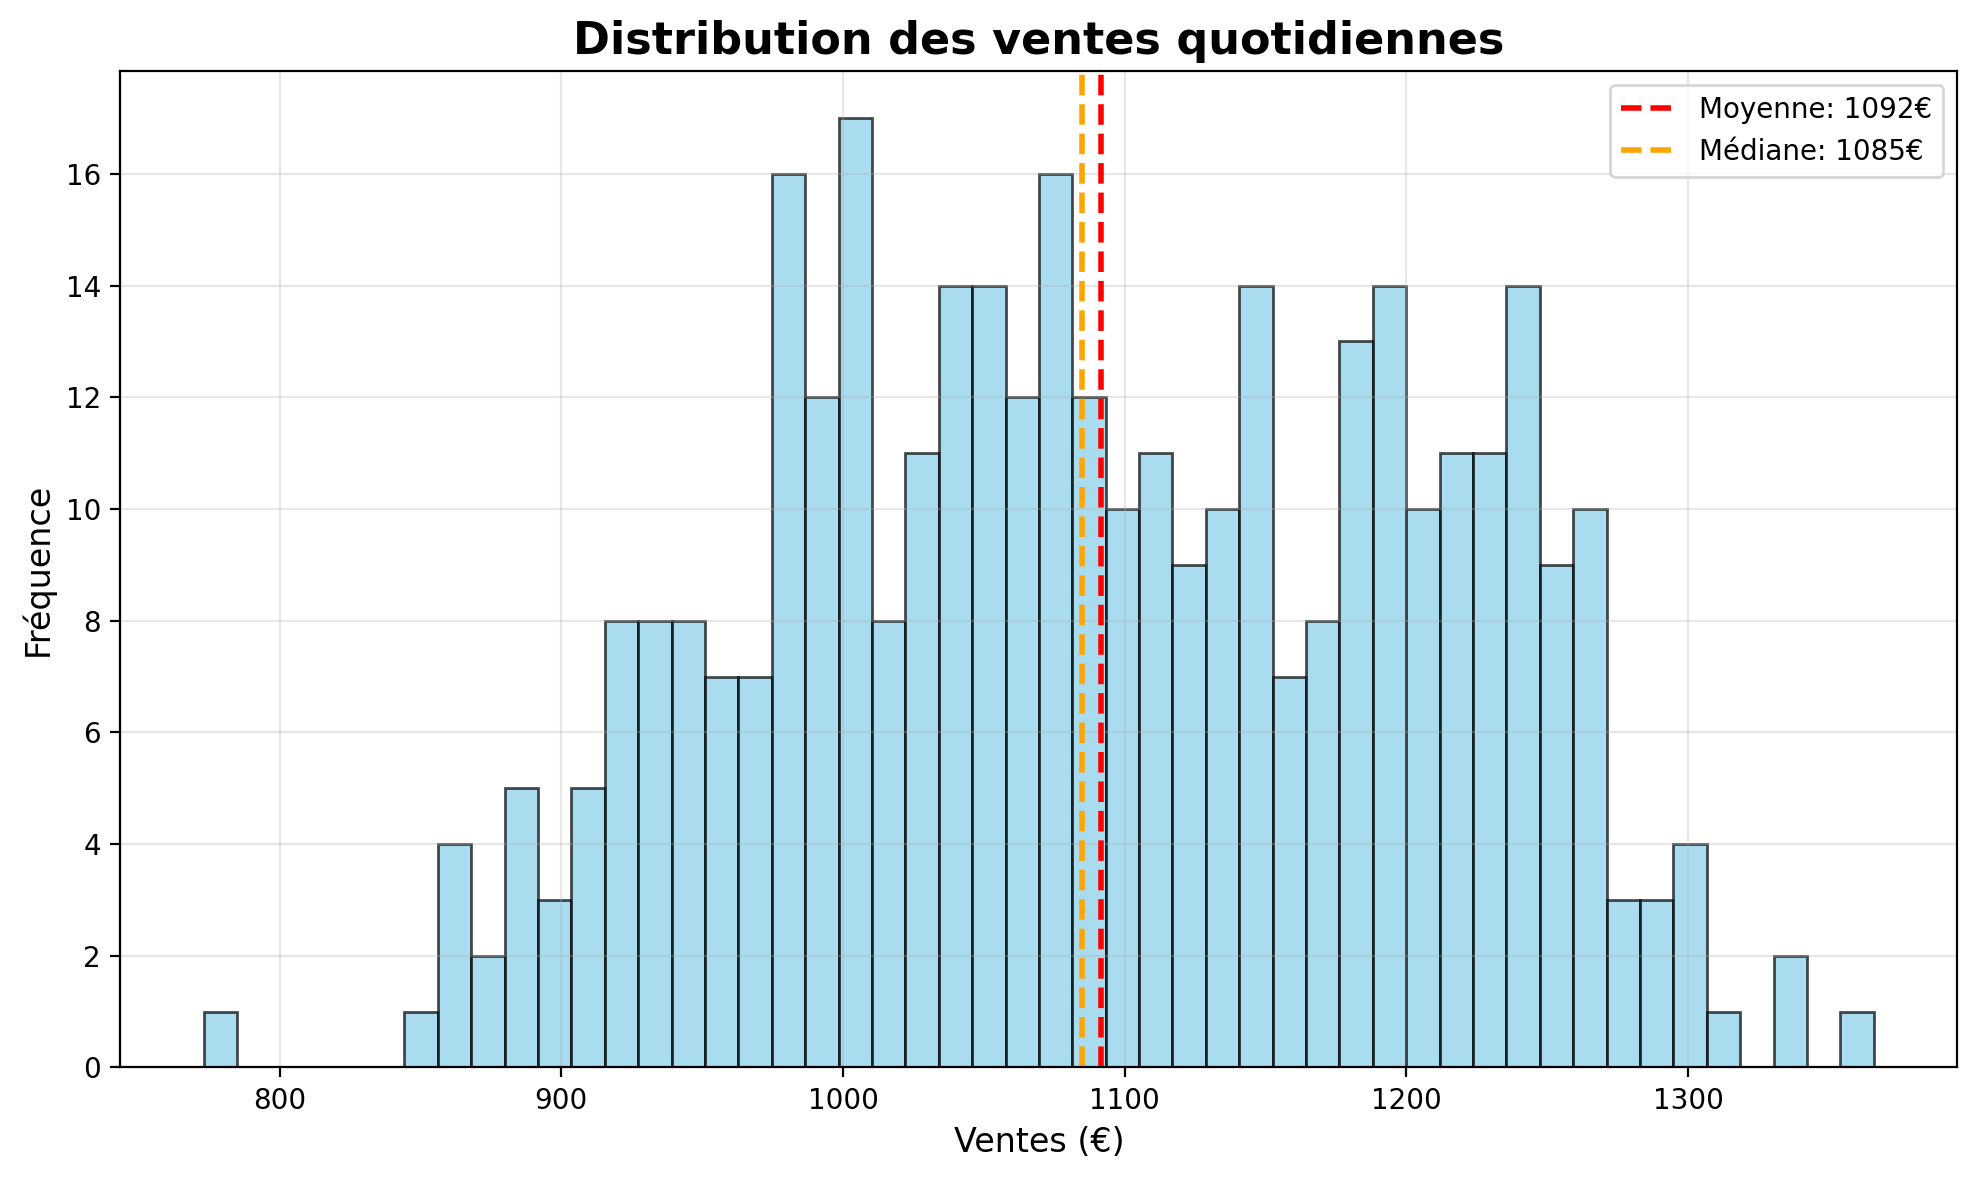

In [5]:
#| fig-cap: "Distribution des ventes quotidiennes"

plt.figure(figsize=(10, 6))
plt.hist(df['sales'], bins=50, edgecolor='black', alpha=0.7, color='skyblue')
plt.axvline(df['sales'].mean(), color='red', linestyle='--', linewidth=2, label=f'Moyenne: {df["sales"].mean():.0f}€')
plt.axvline(df['sales'].median(), color='orange', linestyle='--', linewidth=2, label=f'Médiane: {df["sales"].median():.0f}€')
plt.title('Distribution des ventes quotidiennes', fontsize=16, fontweight='bold')
plt.xlabel('Ventes (€)', fontsize=12)
plt.ylabel('Fréquence', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

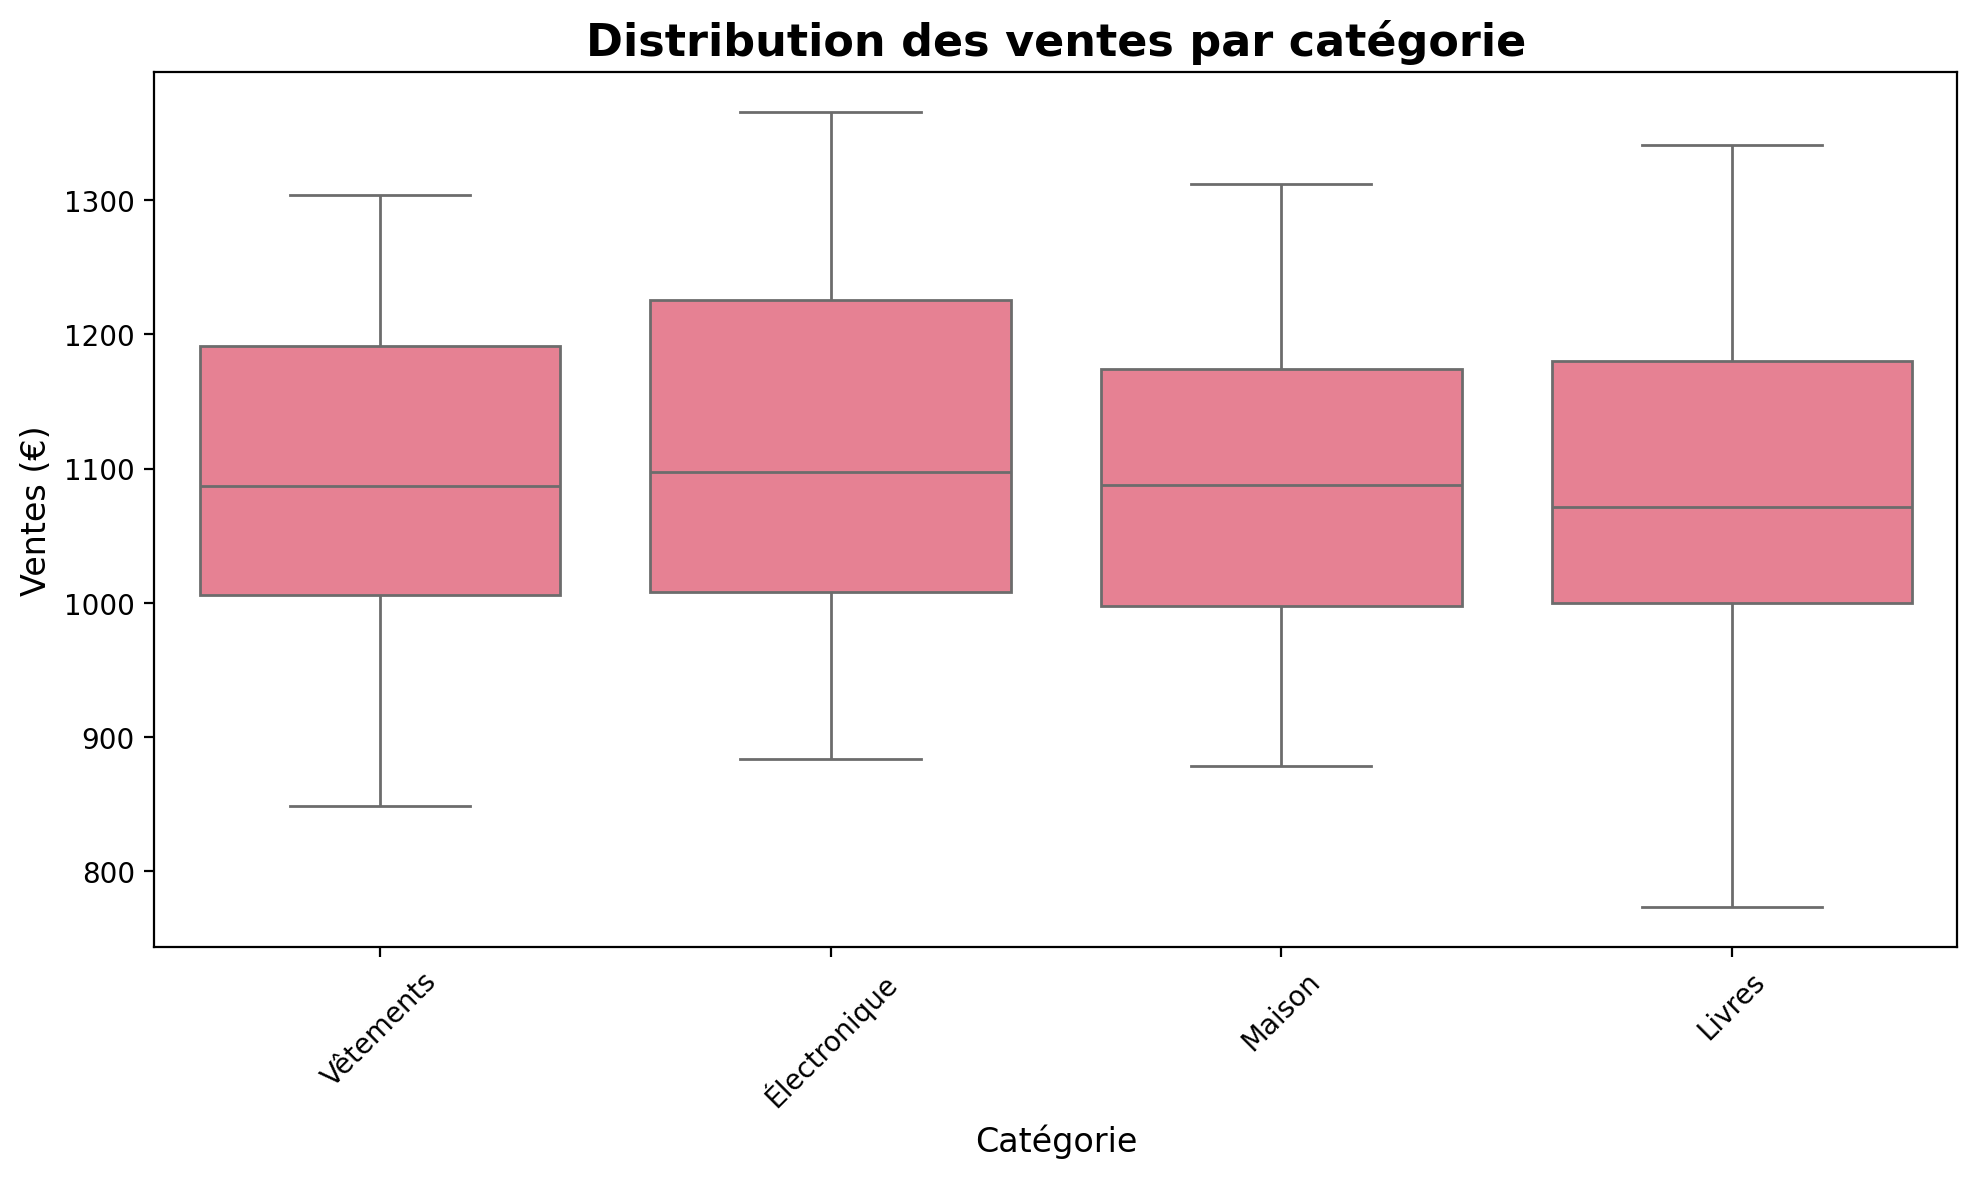

In [6]:
#| fig-cap: "Ventes moyennes par catégorie de produit"

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='category', y='sales')
plt.title('Distribution des ventes par catégorie', fontsize=16, fontweight='bold')
plt.xlabel('Catégorie', fontsize=12)
plt.ylabel('Ventes (€)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

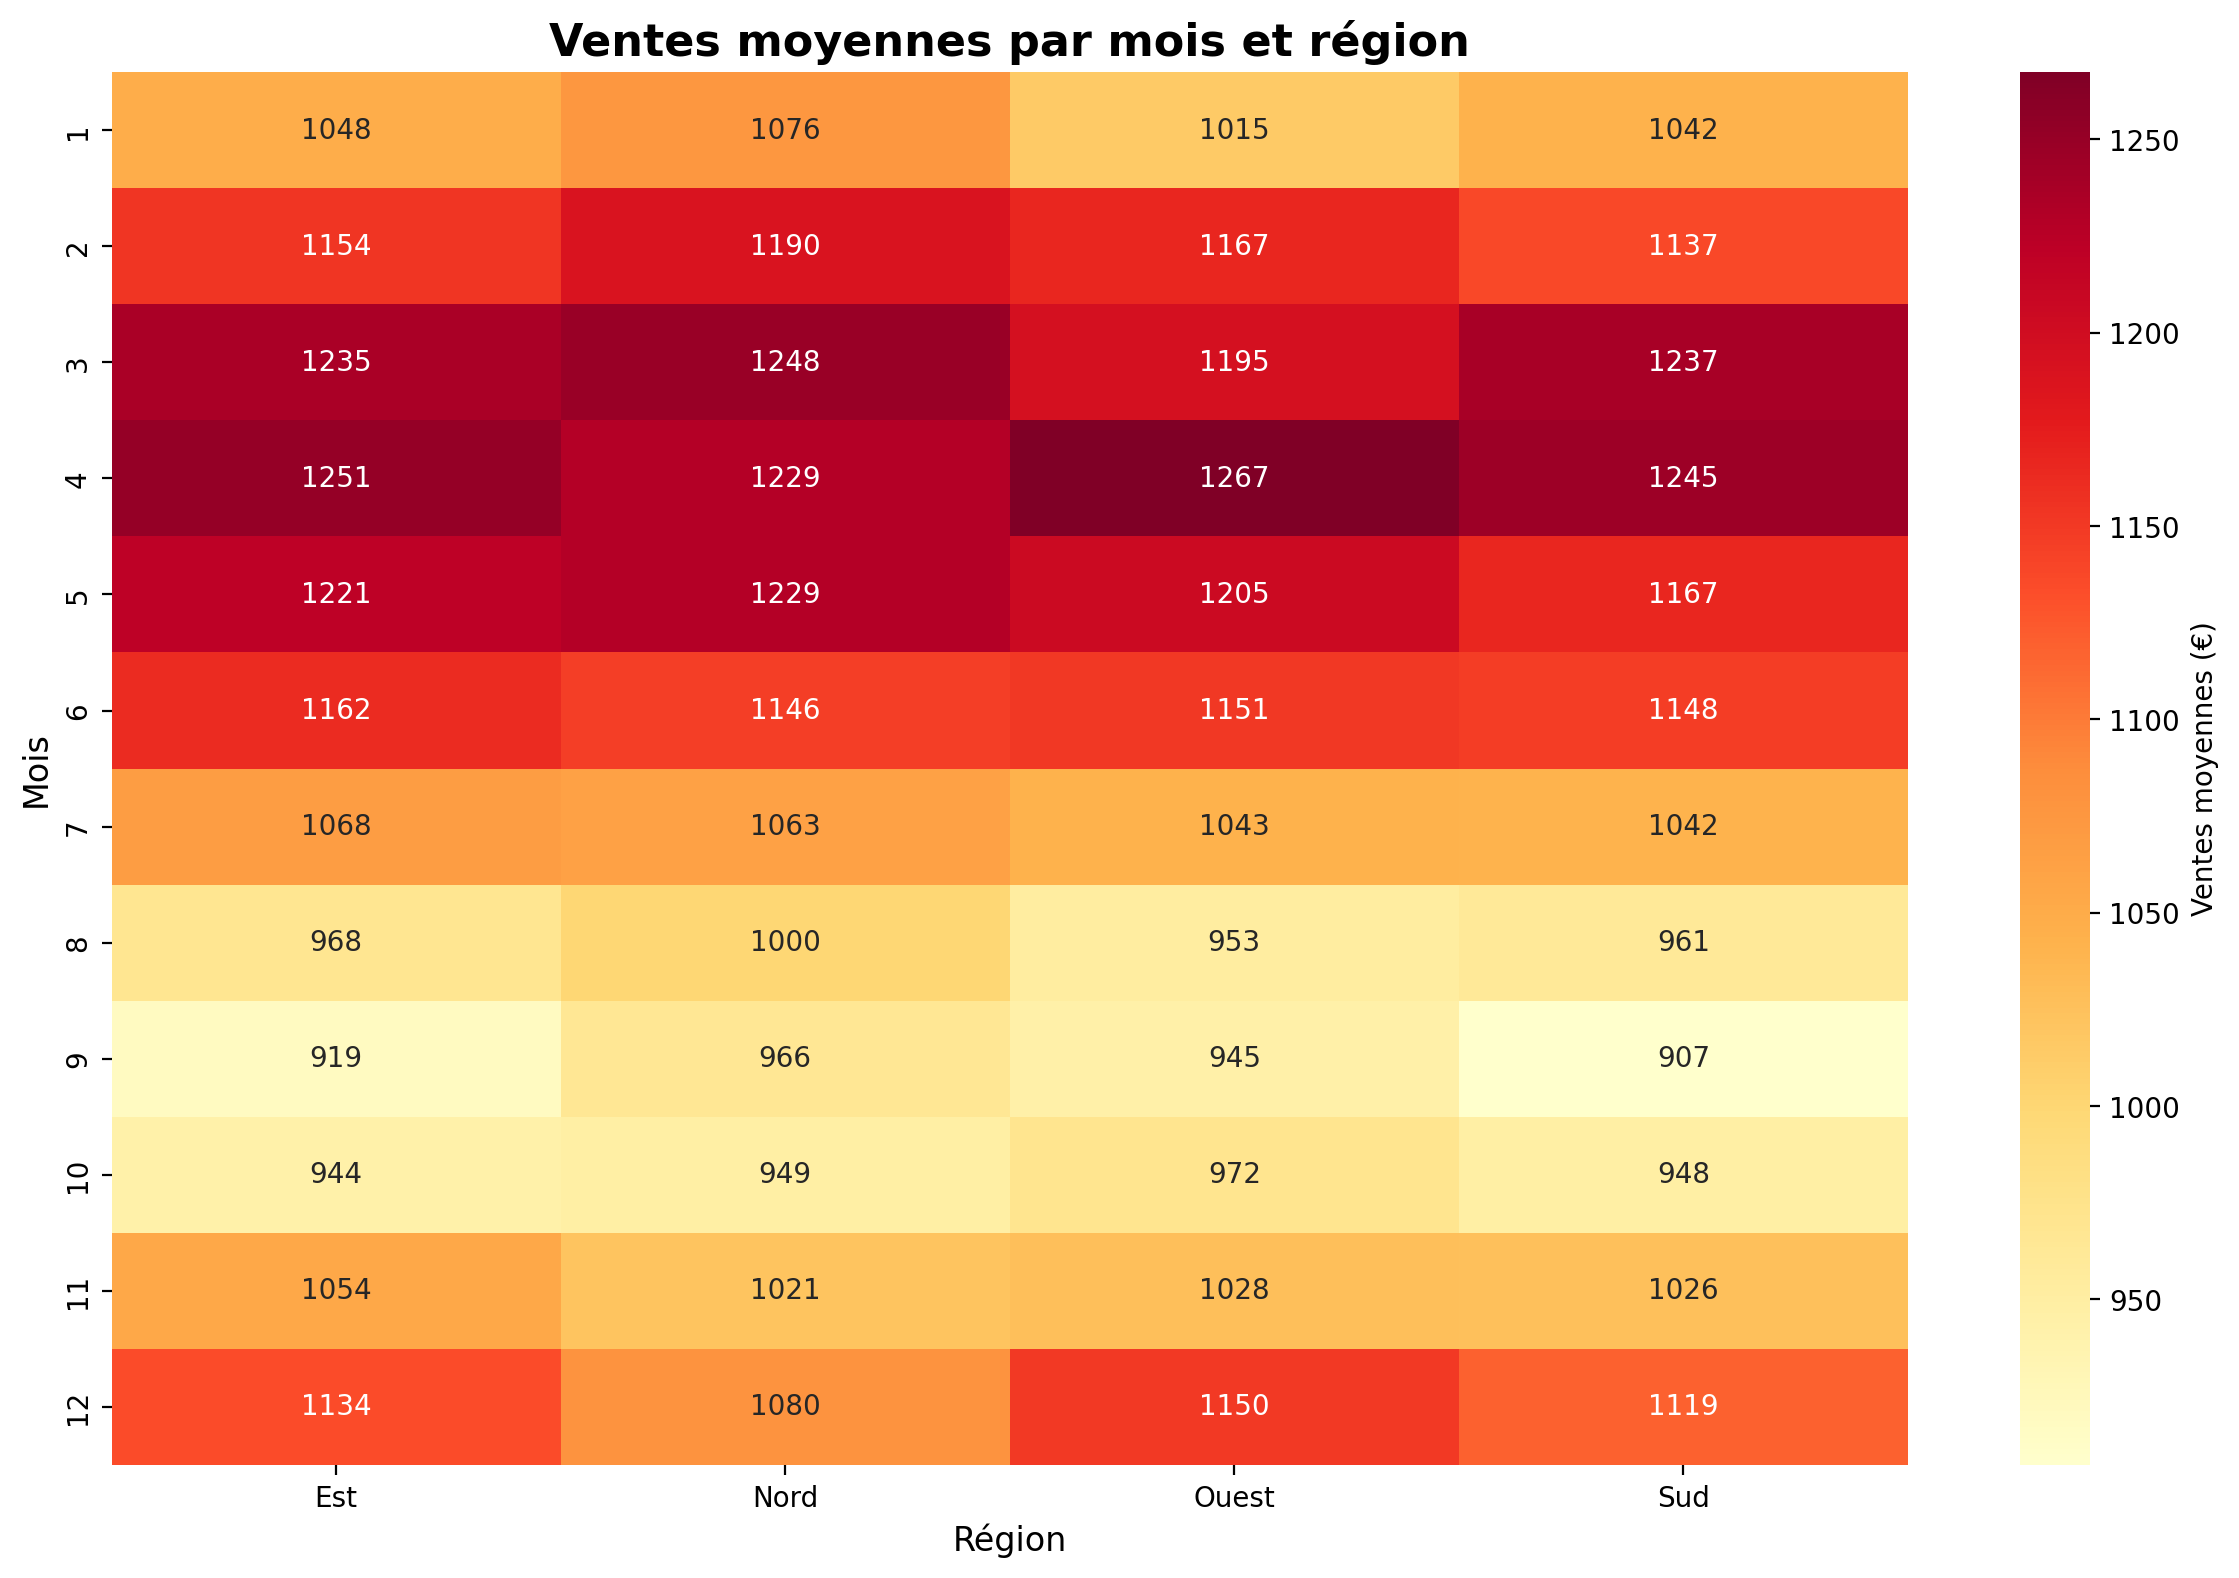

In [7]:
#| fig-cap: "Ventes moyennes par mois et région"

# Préparation des données pour la heatmap
heatmap_data = df.groupby(['month', 'region'])['sales'].mean().unstack()

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt='.0f', cmap='YlOrRd', cbar_kws={'label': 'Ventes moyennes (€)'})
plt.title('Ventes moyennes par mois et région', fontsize=16, fontweight='bold')
plt.xlabel('Région', fontsize=12)
plt.ylabel('Mois', fontsize=12)
plt.tight_layout()
plt.show()

In [8]:
# Statistiques descriptives
print("📊 Statistiques descriptives des ventes :")
print(f"Moyenne : {df['sales'].mean():.2f}€")
print(f"Médiane : {df['sales'].median():.2f}€")
print(f"Écart-type : {df['sales'].std():.2f}€")
print(f"Min : {df['sales'].min():.2f}€")
print(f"Max : {df['sales'].max():.2f}€")

# Ventes par jour de la semaine
sales_by_day = df.groupby('day_of_week')['sales'].mean().sort_values(ascending=False)
print(f"\n📅 Meilleures journées de vente :")
for day, sales in sales_by_day.items():
    print(f"{day}: {sales:.2f}€")

📊 Statistiques descriptives des ventes :
Moyenne : 1091.69€
Médiane : 1084.92€
Écart-type : 114.68€
Min : 773.14€
Max : 1365.90€

📅 Meilleures journées de vente :
Tuesday: 1098.64€
Sunday: 1097.47€
Thursday: 1093.89€
Saturday: 1093.31€
Friday: 1088.09€
Monday: 1087.70€
Wednesday: 1082.68€


In [9]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Création d'un graphique interactif
fig = go.Figure()

# Ajout de la courbe des ventes
fig.add_trace(go.Scatter(
    x=df['date'],
    y=df['sales'],
    mode='lines',
    name='Ventes quotidiennes',
    line=dict(color='blue', width=2)
))

# Ajout de la moyenne mobile
df['sales_ma'] = df['sales'].rolling(window=30).mean()
fig.add_trace(go.Scatter(
    x=df['date'],
    y=df['sales_ma'],
    mode='lines',
    name='Moyenne mobile (30 jours)',
    line=dict(color='red', width=3)
))

# Mise en forme
fig.update_layout(
    title='Évolution des ventes avec moyenne mobile',
    xaxis_title='Date',
    yaxis_title='Ventes (€)',
    hovermode='x',
    width=800,
    height=500
)

fig.show()